In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')


In [2]:
# Load the dataset
file_path = 'E:/PRODIGY INTERN PROJECTS/Mall_Customers.csv'
data = pd.read_csv(file_path)

# Display the dataset to understand its structure
data


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
# Data Preprocessing
# Selecting relevant features
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Check for missing values
print(features.isnull().sum())

# No need for further cleaning if there are no missing values


Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


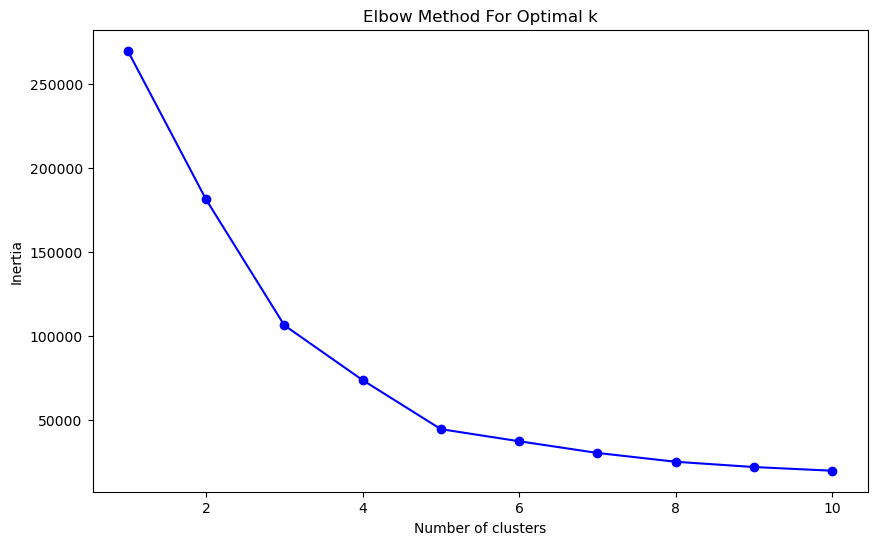

In [4]:
# Apply K-means Clustering
# Determine the optimal number of clusters using the elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

Cluster Centers:
 [[55.2962963  49.51851852]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]]


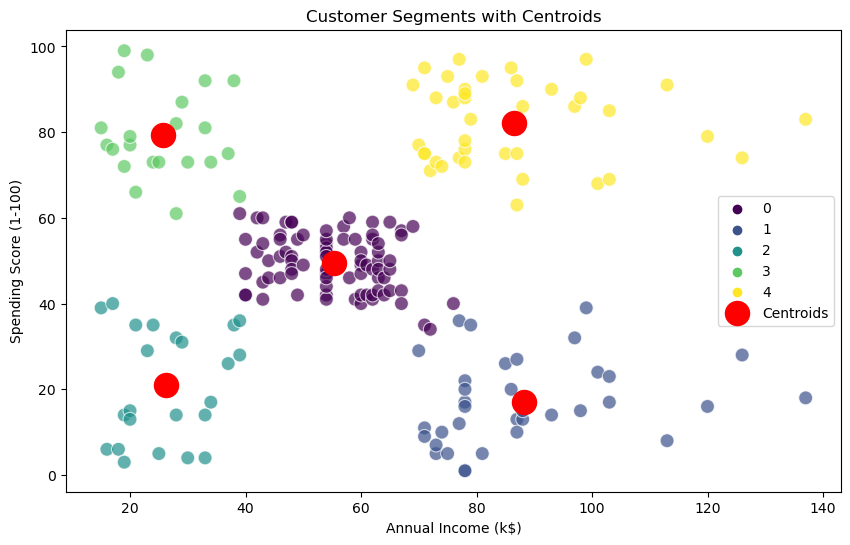

In [5]:
# Apply K-means with the chosen number of clusters
optimal_clusters = 5  # This should be based on the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(features)

# Analyze cluster centers
cluster_centers = kmeans.cluster_centers_
print("Cluster Centers:\n", cluster_centers)

# Visualize the clusters with centroids
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=300, c='red', label='Centroids')
plt.title('Customer Segments with Centroids')
plt.legend()
plt.show()

In [6]:
# Additional Analysis: Print the number of customers in each cluster
cluster_counts = data['Cluster'].value_counts()
print("Number of customers in each cluster:\n", cluster_counts)


Number of customers in each cluster:
 0    81
4    39
1    35
2    23
3    22
Name: Cluster, dtype: int64


In [7]:
# Evaluate clustering quality

from sklearn.metrics import silhouette_score, davies_bouldin_score

silhouette_avg = silhouette_score(features, data['Cluster'])
davies_bouldin_avg = davies_bouldin_score(features, data['Cluster'])

print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {davies_bouldin_avg}')

Silhouette Score: 0.553931997444648
Davies-Bouldin Index: 0.5725628995597086
